In [ ]:
## in this notebook, we will plot the results of running Sorcha
## on a sample of objects of varying nongravitational accelerations

## MEW, 11 Feb 2026

In [3]:
import numpy as np
import pandas as pd
import pylab as plt
import glob

In [13]:
## open each file and count up the number of unique object IDs

fnames = ['/home/ellie/research/lsst/sorcha_output/2000_obj/2000_obj_cart.csv']
fnames = fnames+glob.glob('/home/ellie/research/lsst/sorcha_output/2000_obj/2000_obj_ng_a*0.csv')

In [24]:
a1_counts = []
a1_nongrav = []

a2_counts = []
a2_nongrav = []

a3_counts = []
a3_nongrav = []

for f in fnames: 
    df = pd.read_csv(f)
    if 'a1' in f:
        a1_counts.append(df['ObjID'].nunique())
        a1_nongrav.append(float(f.split('_')[-1][:-4]))
    elif 'a2' in f:
        a2_counts.append(df['ObjID'].nunique())
        a2_nongrav.append(float(f.split('_')[-1][:-4]))
    elif 'a3' in f:
        a3_counts.append(df['ObjID'].nunique())
        a3_nongrav.append(float(f.split('_')[-1][:-4]))
    else:
        #print('saving gravity-only')
        grav_counts = df['ObjID'].nunique()

(1570.0, 1600.0)

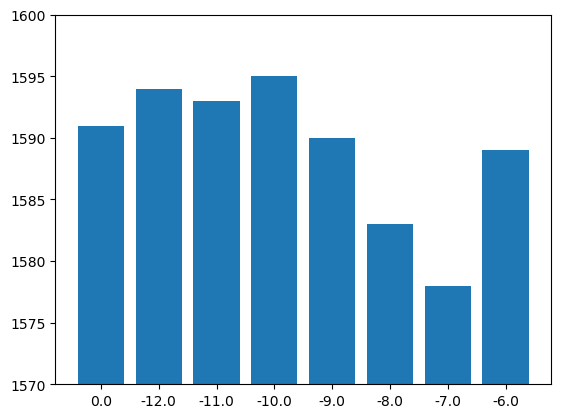

In [61]:
a1 = np.column_stack((np.array(a1_nongrav), np.array(a1_counts)))
sorted_idx = a1[:,0].argsort()
sorted_a1 = a1[sorted_idx]
sorted_a1 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a1))
plt.bar(sorted_a1[:,0].astype(str), sorted_a1[:,1])
plt.ylim(1570,1600)

(1570.0, 1600.0)

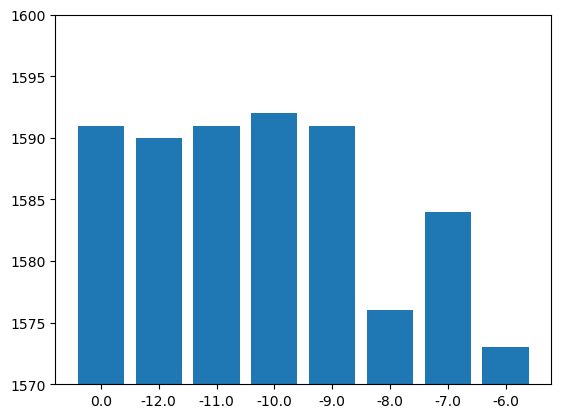

In [62]:
a2 = np.column_stack((np.array(a2_nongrav), np.array(a2_counts)))
sorted_idx = a2[:,0].argsort()
sorted_a2 = a2[sorted_idx]
sorted_a2 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a2))
plt.bar(sorted_a2[:,0].astype(str), sorted_a2[:,1])
plt.ylim(1570,1600)

(1570.0, 1600.0)

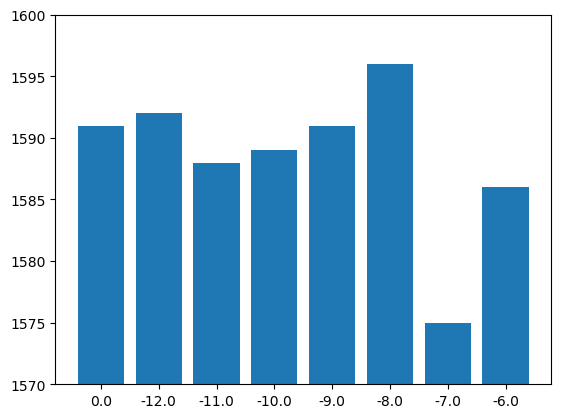

In [63]:
a3 = np.column_stack((np.array(a3_nongrav), np.array(a3_counts)))
sorted_idx = a3[:,0].argsort()
sorted_a3 = a3[sorted_idx]
sorted_a3 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a3))
plt.bar(sorted_a3[:,0].astype(str), sorted_a3[:,1])
plt.ylim(1570,1600)